In [181]:
import pandas as pd
import numpy as np
from whatlies.language import HFTransformersLanguage
from whatlies.transformers import Umap, Tsne, Pca
from whatlies.embeddingset import EmbeddingSet

In [2]:
df = pd.read_csv('/Users/amangal/Downloads/example_bert.csv')

In [3]:
lang = HFTransformersLanguage('distilbert-base-uncased')

In [4]:
emb_set = lang[df.transcript.unique()]

In [12]:
emb_set.transform(Umap(2)).plot_interactive(annot=False)

alt.Chart(...)

<Axes3DSubplot:xlabel='Dimension 0', ylabel='Dimension 1'>

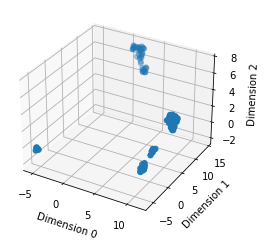

In [18]:
emb_set.transform(Umap(3)).plot_3d(annot=False)

In [20]:
df_embs = emb_set.transform(Umap(3)).to_dataframe()

In [37]:
df_embs.reset_index().drop('index', axis=1)

,0,1,2
0,15.803316,7.095706,12.285900
1,16.291275,7.332299,13.791381
2,16.992901,8.043984,13.652724
3,15.781627,6.995996,11.327009
4,-9.279902,-0.187128,-6.626757
...,...,...,...
123,-9.355058,-0.185936,-6.444938
124,-9.447753,-0.247116,-6.663458
125,-3.814173,9.418555,-1.472758
126,-1.121439,10.470166,-0.886358


In [41]:
embs = EmbeddingSet()

IndexError: tuple index out of range

In [42]:
df.group_id.value_counts()

56.0    88
35.0    49
8.0     27
25.0    11
Name: group_id, dtype: int64

In [43]:
df.head()

,clean_filename,transcript,group_id
0,1572382349.933_in.wav,oh this is the live here from visa card servic...,8.0
1,1573486315.1168_in.wav,um oh this is the live you have to have a a it...,8.0
2,1573573243.176_in.wav,oh this is the live here from visa and a lot o...,8.0
3,1573757941.2768_in.wav,um oh this is a master card services about you...,8.0
4,1573843035.3864_in.wav,so there has been spiritual warfare against yo...,25.0


In [46]:
umap = Umap(2)

In [54]:
emb_group_id_8 = lang[df[df.group_id == 8.0]['transcript'].unique()].transform(umap).add_property('group_id', lambda d: '8')

In [53]:
emb_group_id_25 = lang[df[df.group_id == 25.0]['transcript'].unique()].transform(umap).add_property('group_id', lambda d: '25')

In [52]:
emb_group_id_35 = lang[df[df.group_id == 35.0]['transcript'].unique()].transform(umap).add_property('group_id', lambda d: '35')

In [51]:
emb_group_id_56 = lang[df[df.group_id == 56.0]['transcript'].unique()].transform(umap).add_property('group_id', lambda d: '56')

In [57]:
merged_embs = emb_group_id_8.merge(emb_group_id_25).merge(emb_group_id_35).merge(emb_group_id_56)

In [60]:
merged_embs.plot_interactive(annot=False, color='group_id')

alt.Chart(...)

In [144]:
def get_embedding(row):
    emb = EmbeddingSet({row.clean_filename: lang[row.transcript]}).add_property('Spam Campaign ID', lambda d: str(row.group_id))
    return emb

In [153]:
df['emb'] = df.apply(get_embedding, axis=1)

In [154]:
merged_embs = df['emb'][0]
for i in range(1, len(df['emb'])):
    merged_embs = merged_embs.merge(df['emb'][i])

In [173]:
len(merged_embs)

175

In [179]:
tranformer = Umap(2, random_state=101)
merged_embs.transform(tranformer).plot_interactive(annot=False, 
                                             color='Spam Campaign ID', 
                                             x_label='Embedding Dimension 0', 
                                             y_label='Embedding Dimension 1',
                                             title='Transcript embeddings with reduced dimensions'
                                            )

alt.Chart(...)

In [180]:
tranformer = Tsne(2, random_state=101)
merged_embs.transform(tranformer).plot_interactive(annot=False, 
                                             color='Spam Campaign ID', 
                                             x_label='Embedding Dimension 0', 
                                             y_label='Embedding Dimension 1',
                                             title='Transcript embeddings with reduced dimensions'
                                            )

alt.Chart(...)

In [182]:
tranformer = Pca(2, random_state=101)
merged_embs.transform(tranformer).plot_interactive(annot=False, 
                                             color='Spam Campaign ID', 
                                             x_label='Embedding Dimension 0', 
                                             y_label='Embedding Dimension 1',
                                             title='Transcript embeddings with reduced dimensions'
                                            )

alt.Chart(...)

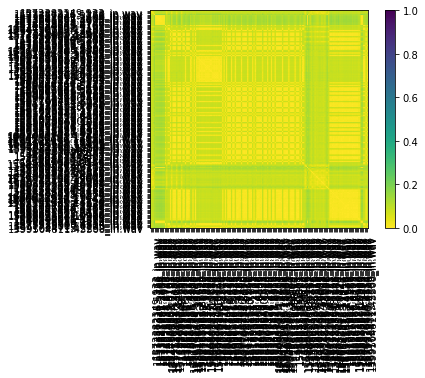

In [93]:
merged_embs.plot_distance()

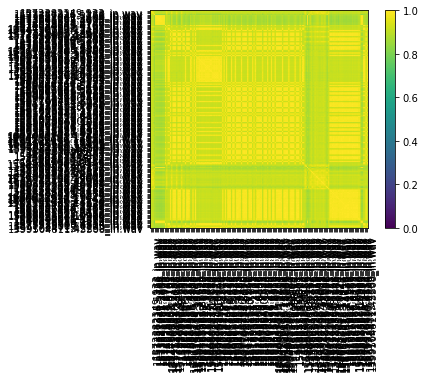

In [94]:
merged_embs.plot_similarity()

<Axes3DSubplot:title={'center':'BERT Embeddings with reduced dimensions using UMAP'}, xlabel='BERT + Umap(2) (Dimension 0)', ylabel='BERT + Umap(2) (Dimension 1)'>

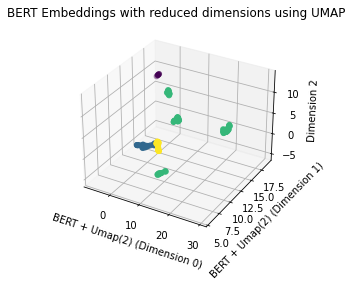

In [95]:
merged_embs.transform(Umap(3)).plot_3d(annot=False, 
                                             color='group_id', 
                                             x_label='BERT + Umap(2) (Dimension 0)', 
                                             y_label='BERT + Umap(2) (Dimension 1)',
                                             title='BERT Embeddings with reduced dimensions using UMAP'
                                            )

In [118]:
embs_df = merged_embs.transform(Umap(2)).to_dataframe()

In [119]:
from sklearn.cluster import DBSCAN
from sklearn import metrics

In [120]:
X = embs_df.reset_index().drop('index', axis=1).values

In [127]:
db = DBSCAN(eps=3, min_samples=2).fit(X)

In [128]:
db.labels_

array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 2, 3, 0, 3, 3, 3, 0,
       3, 3, 4, 0, 4, 3, 2, 4, 5, 3, 2, 2, 4, 2, 4, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 5, 2, 3, 2, 4, 5, 6, 2,
       4, 5, 2, 4, 6, 3, 5, 2, 5, 4, 3, 4, 2, 3, 4, 6, 2, 4, 2, 4, 5, 6,
       3, 4, 2, 6, 4, 6, 2, 3, 4, 2, 4, 4, 2, 3, 3, 5, 5, 4, 2, 5, 6, 4,
       4, 2, 6, 4, 4, 4, 2, 4, 6, 6, 2, 4, 2, 2, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 6, 5, 6, 5, 5, 3, 4, 5,
       4, 3, 6, 6, 6, 6, 5, 6, 4, 6, 6, 6, 6, 4, 4, 1, 1, 2, 2, 4, 2])

Estimated number of clusters: 7
Estimated number of noise points: 0
Silhouette Coefficient: 0.902


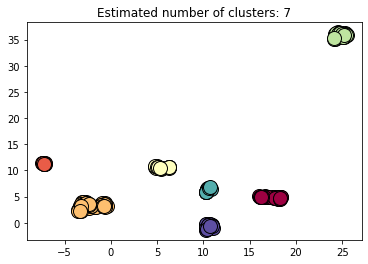

In [129]:
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, labels))

# #############################################################################
# Plot result
import matplotlib.pyplot as plt

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()